# 0.) Import and Clean data

In [8]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
#drive.mount('/content/gdrive/', force_remount = True)
data = pd.read_csv("Country-data.csv", sep = ",")

In [7]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [13]:
names = data["country"].copy()
X = data.drop(["country"], axis = 1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X)

X_scaled = scaler.transform(X)
#X_test = scaler.transform(X_test)


# 1.) Fit a kmeans Model with any Number of Clusters

In [15]:
KMeans?

In [78]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

/Users/haydenpeoples/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# 2.) Pick two features to visualize across

In [79]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

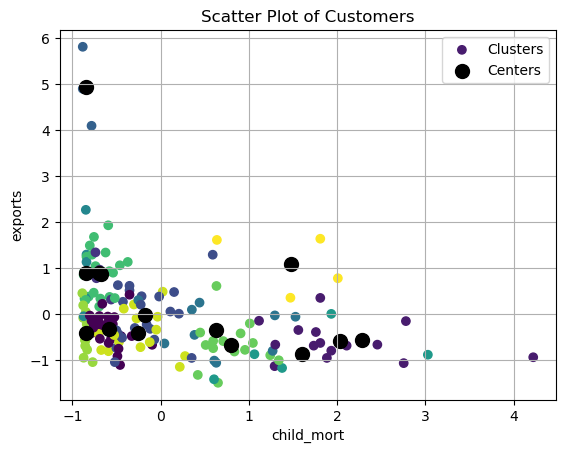

In [85]:
import matplotlib.pyplot as plt

x1_index = 0 #number of first index we want to look at 
x2_index = 1 #number of second index we want to look at 

#for example, this conbunation compares child mortality (index = 0), and exports (index = 1)


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [81]:
WCSSs = []
ks = range(1,15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30)  #n_init is the number of times it is run with different centroid seeds
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [82]:
WCSSs  #we did not converge on the minimum because inertia is still to large, we need more initial random centers
# need more trials

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3229986404374,
 631.3877859960571,
 550.4900815621768,
 495.3233825951919,
 452.3657557356715,
 424.5403992096379,
 394.19462144605757,
 373.95641827464806,
 353.10141512530004,
 334.1083052504682,
 314.7507172168882]

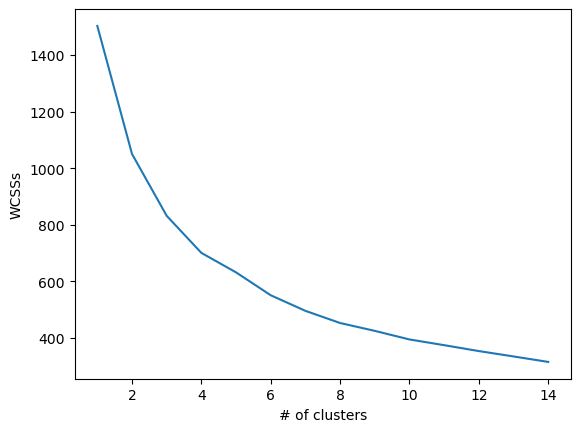

In [83]:
plt.plot(ks, WCSSs)
plt.xlabel('# of clusters')
plt.ylabel('WCSSs')
plt.show()

## Optimal number of clusters is at an elbow point, there is no clear kink in this chart, but I would guess the optimal point would be between 4 and 7 

In [31]:
#BONUS 
WCSSs1 = [KMeans(n_clusters = k, n_init = 30).fit(X_scaled).inertia_ for k in range(1,15)]

In [32]:
WCSSs1

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3229986404374,
 628.5382539105315,
 550.4475856323835,
 495.3233825951919,
 454.0128117642086,
 424.6380722260375,
 396.2614414066406,
 368.8986567596014,
 355.8945163810198,
 334.46129223254457,
 319.1337940351601]

# 6.) Do the same for a silhoutte plot

In [43]:
from sklearn.metrics import silhouette_score

In [52]:
SCs = []    #init = "ramdom"
ks = range(2,15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30)  #n_init is the number of times it is run with different centroid seeds
    kmeans.fit(X_scaled)
    SCs.append(silhouette_score(X_scaled, kmeans.labels_))


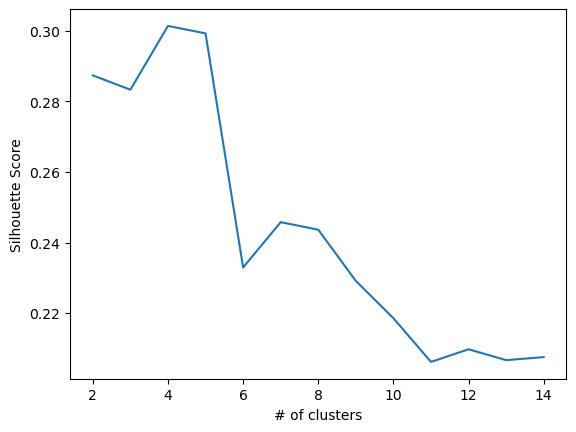

In [54]:
plt.plot(ks, SCs)
plt.xlabel('# of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### 4 or 5 here seem to be the optimal number of cliusters

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [ ]:
kmeans = KMeans(n_clusters = 2, n_init = 30).fit(X_scaled) #using 2 because we want to compare 2 groups
# even though 2 is suboptimal

In [58]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [70]:
output = pd.concat([preds, data], axis = 1)
output 

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,1,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [64]:
output
print('Cluster 1:')
list(output.loc[output[0] == 0, 'country'])

Cluster 1:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

## These are all the countries that are in the same cluster

In [ ]:
#### Write an observation

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [73]:
#kmeans

In [74]:
q8 = pd.concat([preds, X], axis = 1)

In [75]:
q8.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [76]:
q8.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


# 9.) Write an observation about the descriptive statistics.

### these statistics just represent the mean of the metrics between the two different clusters. We see for example one cluster (cluster index = 0) has reletavely low levels of child mortality, inflation, and fertility, and reletavely high levels of exports, imports, income, life expectancy, and GDPP. The 0 cluster seems to represent more developed countries while the 1 cluster is underdeveloped or developing countries. 